<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

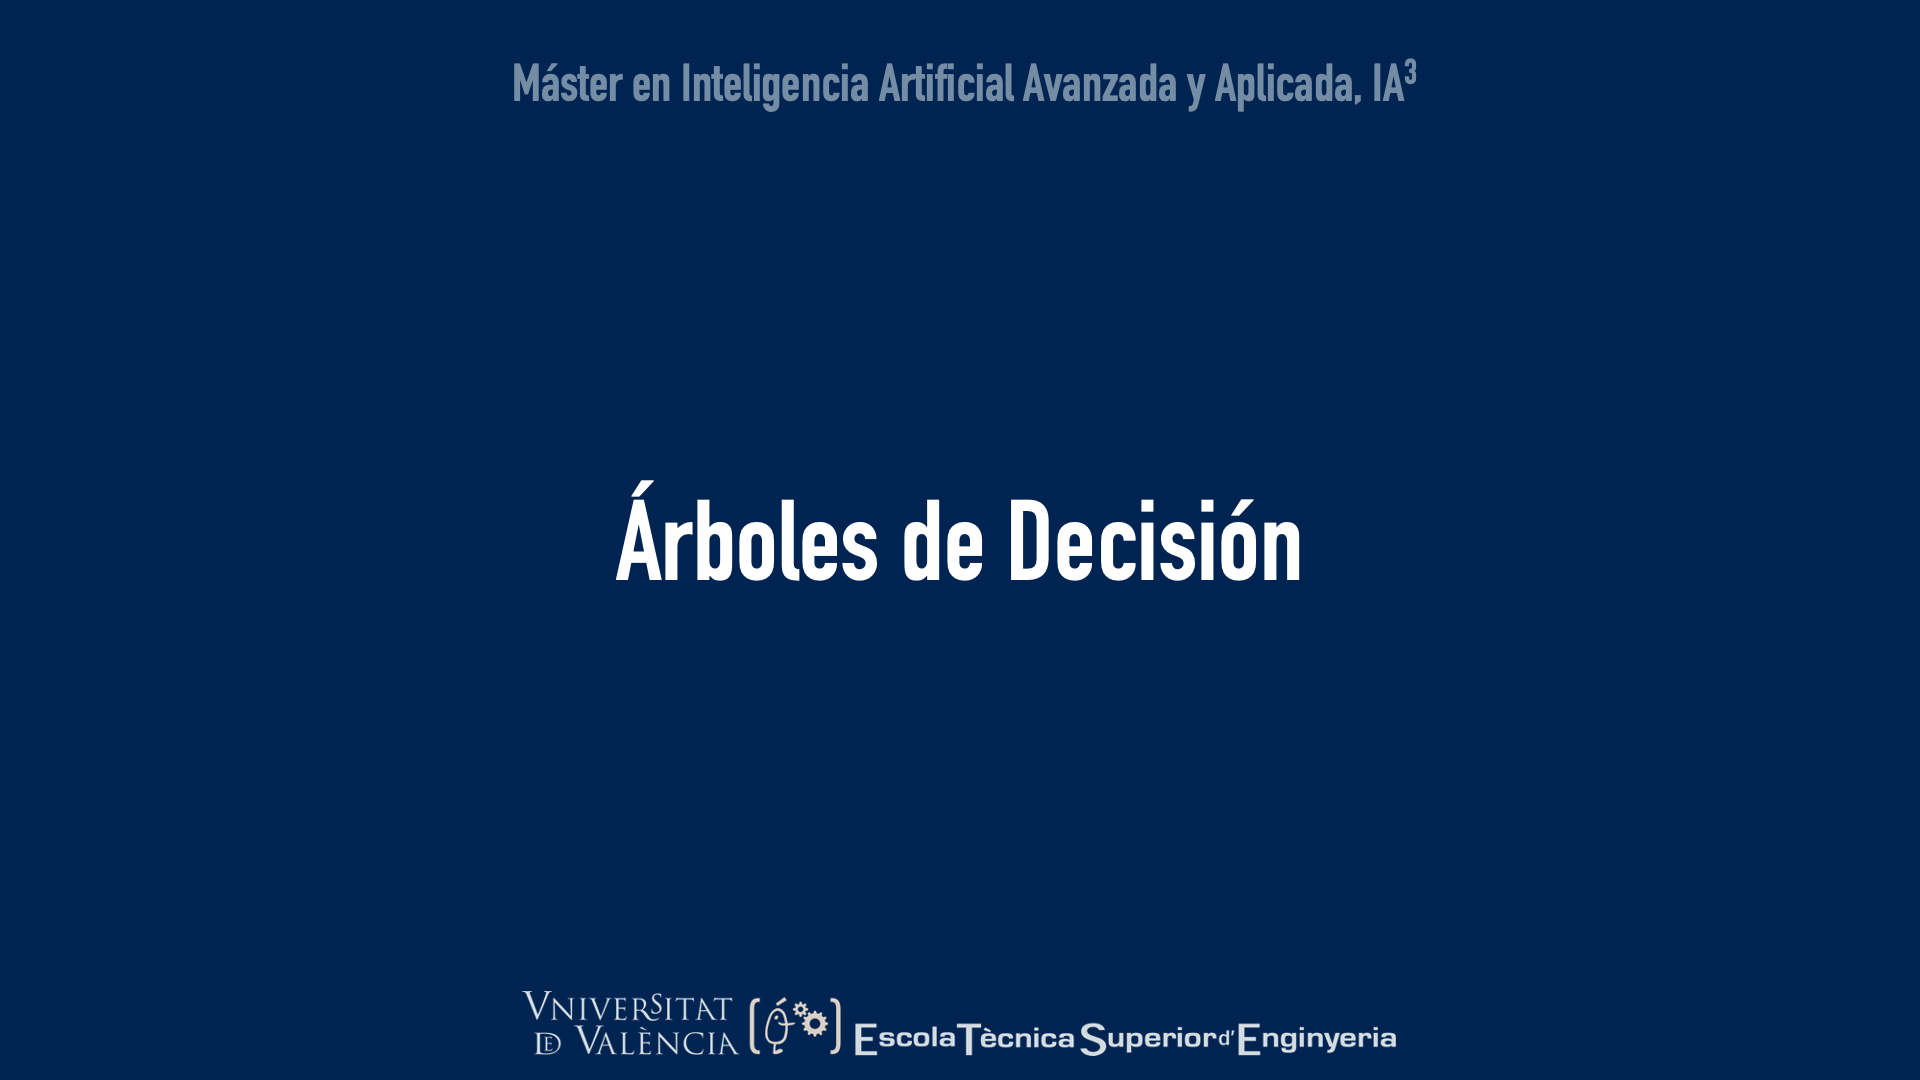

Los árboles de decisión son uno de los algoritmos más conocidos entre los clásicos. Se han aplicado para resolver problemas analíticos en multitud de ámbitos. Por dar un ejemplo de su versatilidad la inteligencia artificial del videojuego Black and White está desarrollada utilizando este flexible algoritmo.

https://en.wikipedia.org/wiki/Black_%26_White_(video_game)

Este tipo de algoritmo intenta dividir el dataset utilizando distintas variables hasta alcanzar la mejor división posible.

Para aprender a manejar este algoritmo, vamos a preparar un proyecto desde 0 basado en árboles de decisión.

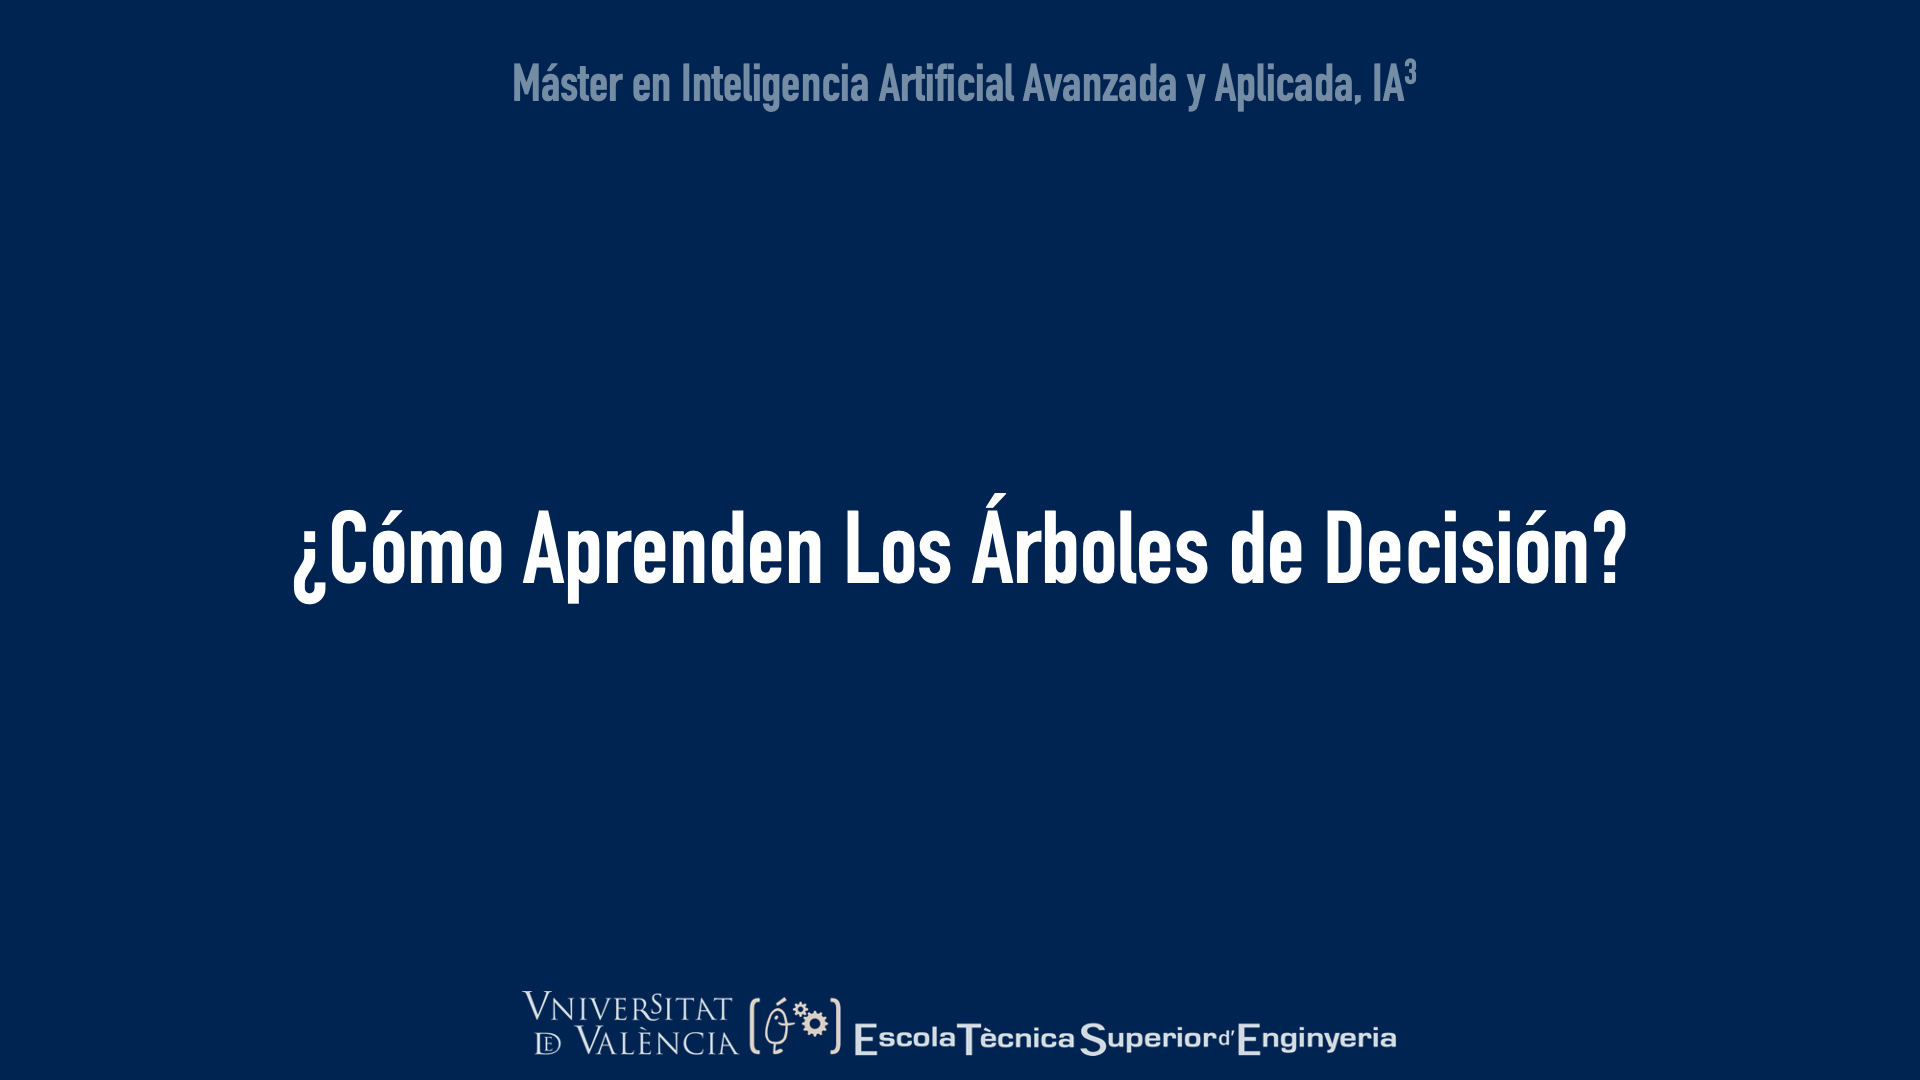

Vamos a realizar una pequeña aproximación teórica al entrenamiento de árboles de decisión. Este tipo de algoritmos intenta encontrar la variable que mejor divida al dataset. Dependiendo del ejercicio propuesto intentará realizar la división en una o más ramas (One vs the rest o One vs one). Sin embargo, independientemente del número de divisiones propuestas, siempre priorizará la variable que obtenga una mejor división, por este motivo se dice que sigue un criterio egoísta o codicioso (greed).

Utilizando el modelo sencillo anterior vamos a intentar realizar diversas divisiones sobre el dataset de Iris y vamos a medir la pureza de los datasets resultantes de este ejercicio.

Utilizando la variable petal length realiza divisiones del dataset en los siguientes puntos:

- Cuartil 25
- Cuartil 50
- Cuartil 75

En base a los resultados y a las gráficas calculadas:



In [4]:
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from math import log

In [5]:
dataset = sns.load_dataset("iris")

In [6]:
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
def transform_classes(y, class_name):
  new_classes = []
  for sample in y:
    if sample == class_name:
      new_sample = class_name
    else:
      new_sample = "Other"
    new_classes.append(new_sample)
  return new_classes

def basic_splitter(df, threshold, class_name, split_type = "lower"):
  Y = transform_classes(df["species"], class_name)
  df["species"] = Y
  if split_type == "lower":
    bool_array = df["petal_length"] < threshold
  elif split_type == "greater":
    bool_array = df["petal_length"] > threshold
  dataset_filtered = df[bool_array]
  return dataset_filtered

In [13]:
# Ejemplo

threshold = 1

df_filtered = basic_splitter(dataset, threshold, 
                             "setosa", split_type = "greater")


In [14]:
df_filtered.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Other,100,100,100,100
setosa,49,49,49,49


In [15]:
def entropy_calculation(selected_class, other):
  total = selected_class+other
  prob_class = selected_class/total
  prob_other = other/total
  entropy_class = - prob_class * log(prob_class+0.00001,2)
  entropy_other = - prob_other * log(prob_other+0.00001,2)
  entropy = entropy_class + entropy_other
  return entropy

In [19]:
entropy_calculation(49, 100)

0.913727577363888

Continuemos realizando nuestro ejercicio de clasificación utilizando el módulo de sklearn para entrenar un DecisionTreeClassifier. Una vez capturada la intuición de como este algoritmo aprende a distinguir entre clases, visualizaremos el resultado de ajustarlo a un set de entrenamiento y comprobaremos que los splits que hemos realizado sobre el espacio son en efecto decisiones que podría tomar el algoritmo (aproximadamente).

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [23]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [30]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
model.score(X_train, Y_train)

1.0

In [29]:
model.score(X_test, Y_test)

1.0

[Text(167.4, 163.07999999999998, 'petal_length <= 2.45\nentropy = 0.924\nsamples = 112\nvalue = [74, 38]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 74\nvalue = [74, 0]')]

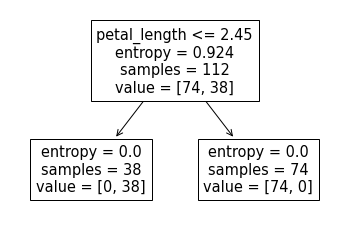

In [34]:
plot_tree(model, feature_names=X.columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Other
146,6.3,2.5,5.0,1.9,Other
147,6.5,3.0,5.2,2.0,Other
148,6.2,3.4,5.4,2.3,Other
